# **PHASE 5: MODEL EVALUATION (40 minutes)**

### **Requirements:**

**5.1 Confusion Matrix**
- Calculate confusion matrix
- Display as 2x2 matrix showing:
  - True Negatives (top-left)
  - False Positives (top-right)
  - False Negatives (bottom-left)
  - True Positives (bottom-right)
- Create visualization (heatmap) of confusion matrix
- Label axes clearly (Actual vs Predicted)
                                         PREDICTED
                                           0    1
                                       |-----|-----|
                            ACTUAL  0  | TN  | FP  |
                                    1  | FN  | TP  |

**5.2 Classification Report**
- Generate full classification report showing:
  - Precision for each class
  - Recall for each class
  - F1-score for each class
  - Support for each class

**5.3 Manual Metric Calculation**
Extract from confusion matrix:
- True Positives (TP)
- False Negatives (FN)
- False Positives (FP)
- True Negatives (TN)

Calculate manually:
- Recall = TP / (TP + FN)
- Precision = TP / (TP + FP)
- Accuracy = (TP + TN) / Total

Display in business terms:
- "We caught X% of all defaults" (recall)
- "X% of our alerts were correct" (precision)
- "We missed X defaults" (false negatives)
- "We had X false alarms" (false positives)

**5.4 Model Performance Analysis**
Answer these questions:
- Is recall high enough to catch most defaults?
- Is precision acceptable (too many false alarms)?
- Which error is more costly: missing a default (FN) or false alarm (FP)?
- Would you recommend this model for production use?

**Deliverable:**
- Confusion matrix visualization
- Classification report
- Written analysis (3-5 sentences) on model performance
- Recommendation: Deploy or improve?


(30000, 24)
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                     

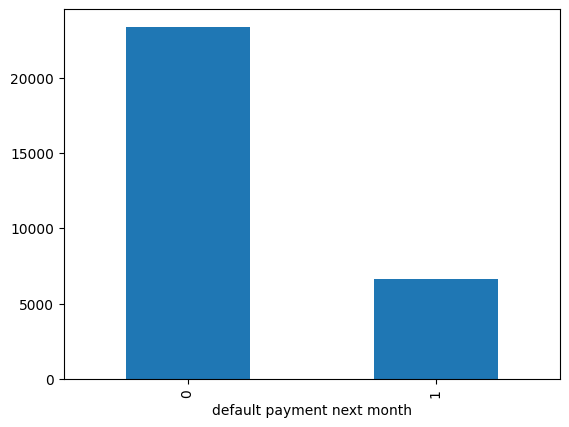

/Users/garimajaiswal/Learning/AI-ML/ai-ml-learning-journey/.venv/lib/python3.14/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/var/folders/2s/x8m_y47566sf21659r0nw6s40000gn/T/ipykernel_12898/1085564212.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace([np.inf, -np.inf], np.nan, inplace=True)


default payment next month
True    True
Name: count, dtype: bool
Missing values remaining: 0
<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 1 to 30000
Series name: default payment next month
Non-Null Count  Dtype
--------------  -----
30000 non-null  int64
dtypes: int64(1)
memory usage: 234.5 KB
None
(24000, 12)
(6000, 12)
(24000,)
(6000,)

Default Rate (Train): 0.2212
Default Rate (Test):  0.2212
(24000, 12)
(6000, 12)
(24000,)
(6000,)

Default Rate (Train): 0.2212
Default Rate (Test):  0.2212
-2.0378760407563984e-17
0.0025179358450981206
6908     0
24576    0
26767    0
2157     1
3180     0
29383    0
24455    0
23887    0
5505     0
29721    0
Name: default payment next month, dtype: int64
[0 0 0 0 0 1 0 0 0 0]
[0.31918037 0.35932168 0.37611202 0.29442527 0.20391145 0.64208208
 0.32695726 0.26722283 0.24498706 0.33521054]


In [3]:
import pandas as pd
from pandas import value_counts

# execute all the cells in the phase 2 notebook and make the variables available here
%run ./phase4_model_training.ipynb

if False:
    original_data = pd.DataFrame()
    X_train = pd.DataFrame()
    X_test = pd.DataFrame()
    y_train = pd.DataFrame()
    y_test = pd.DataFrame()
    predictions = pd.DataFrame()

**5.1 Confusion Matrix**
- Calculate confusion matrix
- Display as 2x2 matrix showing:
  - True Negatives (top-left)
  - False Positives (top-right)
  - False Negatives (bottom-left)
  - True Positives (bottom-right)
- Create visualization (heatmap) of confusion matrix
- Label axes clearly (Actual vs Predicted)

                            PREDICTED
                               0    1
                           |-----|-----|
                ACTUAL  0  | TN  | FP  |
                        1  | FN  | TP  |

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

con_matrix = confusion_matrix(y_test,predictions)
print(con_matrix)

[[3814  859]
 [ 581  746]]


In [16]:
print(f'True negatives = { con_matrix[0][0]}')
print(f'False positive = { con_matrix[0][1]}')
print(f'False negatives = { con_matrix[1][0]}')
print(f'True positives = { con_matrix[1][1]}')

True negatives = 3814
False positive = 859
False negatives = 581
True positives = 746


Text(50.722222222222214, 0.5, 'Actual')

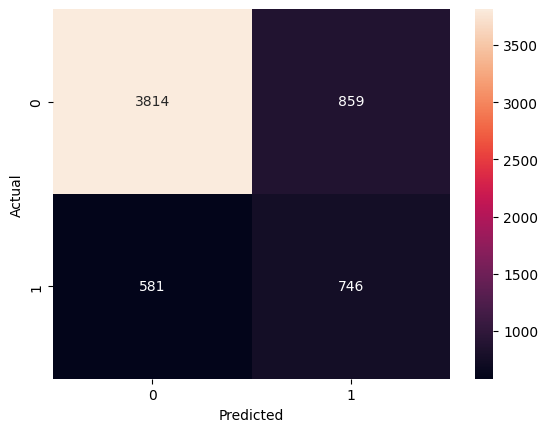

In [37]:
axes1=sns.heatmap(con_matrix, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# axes1

5.2 Classification Report

    Generate full classification report showing:
    Precision for each class
    Recall for each class
    F1-score for each class
    Support for each class


In [43]:
from sklearn.metrics import classification_report
classification_rpt = classification_report(y_test,predictions)
print(classification_rpt)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4673
           1       0.46      0.56      0.51      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000

